# Statistika NBA igralcev v sezoni 2017/2018


## Analizo bomo razdelili na dva dela:

* V prvem delu bomo glede na statistiko igralcev naredili celovito analizo

* V drugem delu bomo vključili podatke o plačah igralcev in poskušali poiskati najbolj zaželjene igralce. 
    Raziskali bomo ali so najbolj učinkoviti igralci tudi najbolje plačani.

# Naložili bomo podatke potrebne za prvi del analize.

In [2]:
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt

igralci = pd.read_csv('obdelani-podatki/igralci.csv' )


pd.options.display.max_rows = 15
pd.options.display.max_columns = 10


In [38]:
igralci

,ime,pozicija,starost,odigrane_tekme,prva_postava,...,ukradene_zoge,blokade,izgubljene_zoge,osebne_napake,tocke
0,Alex Abrines,SG,24,75,8,...,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,70,8,...,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,76,76,...,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,69,19,...,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,53,3,...,0.1,0.2,0.4,1.1,3.4
5,Cole Aldrich,C,29,21,0,...,0.1,0.0,0.0,0.5,0.6
6,LaMarcus Aldridge,C,32,75,75,...,0.6,1.2,1.5,2.1,23.1
...,...,...,...,...,...,...,...,...,...,...,...
533,Nick Young,SG,32,80,8,...,0.5,0.1,0.5,1.3,7.3
534,Thaddeus Young,PF,29,81,81,...,1.7,0.4,1.3,2.2,11.8


Naši podatki vsebujejo 540 igralcev s podatki v 26 različnih statističnih kategorijah. 

In [3]:
igralci = igralci[(igralci.odigrane_tekme > 20) & (igralci.igralni_cas > 5)]
igralci

,ime,pozicija,starost,odigrane_tekme,prva_postava,...,ukradene_zoge,blokade,izgubljene_zoge,osebne_napake,tocke
0,Alex Abrines,SG,24,75,8,...,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,70,8,...,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,76,76,...,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,69,19,...,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,53,3,...,0.1,0.2,0.4,1.1,3.4
6,LaMarcus Aldridge,C,32,75,75,...,0.6,1.2,1.5,2.1,23.1
7,Jarrett Allen,C,19,72,31,...,0.4,1.2,1.1,2.0,8.2
...,...,...,...,...,...,...,...,...,...,...,...
533,Nick Young,SG,32,80,8,...,0.5,0.1,0.5,1.3,7.3
534,Thaddeus Young,PF,29,81,81,...,1.7,0.4,1.3,2.2,11.8


Zanimajo nas igralci, ki so v sezoni odigrali več kot dvajset tekem, s povprečnim igralnim časom več kot pet minut.
Tako nam za analizo ostanejo vsi relativno aktivni igralci.

In [24]:
povprečen_igralec = igralci.mean().round(2)
povprečen_igralec

starost            26.36
odigrane_tekme     61.49
prva_postava       30.27
igralni_cas        22.31
uspesni_meti        3.64
poskusi_metov       7.93
procent_metov       0.46
                   ...  
skok                4.03
podaje              2.15
ukradene_zoge       0.72
blokade             0.45
izgubljene_zoge     1.27
osebne_napake       1.85
tocke               9.76
Length: 25, dtype: float64

Tako izgleda naš povprečen igralec.

In [42]:
igralci.groupby('pozicija').mean().sort_values('tocke', ascending=False).round(2)

,starost,odigrane_tekme,prva_postava,igralni_cas,uspesni_meti,...,ukradene_zoge,blokade,izgubljene_zoge,osebne_napake,tocke
pozicija,,,,,,,,,,,
PG,26.37,58.74,29.84,23.36,3.82,...,0.89,0.23,1.67,1.78,10.42
SG,26.31,62.77,27.43,23.15,3.73,...,0.77,0.27,1.23,1.66,10.35
PF,25.86,62.99,30.13,22.45,3.77,...,0.62,0.56,1.17,1.89,10.03
SF,26.25,61.16,34.41,23.11,3.35,...,0.79,0.36,1.06,1.83,9.12
C,26.91,61.64,30.80,19.74,3.47,...,0.53,0.81,1.18,2.11,8.78


Kot vidimo, je število doseženih točk igralca odvisno od njegove pozicije. Ne preseneča nas, da v povprečju PG dosega največ točk, saj je zadolžen za organizacijo napadov in ima žogo veliko časa v posesti, medtem pa je C v večini odvisen od dobrih podaj svojih soigralcev, zato po številu točk težje konkurira ostalim pozicijam. 

Opazimo tudi, da organizatorji v povprečju izgubijo največ žog, kar se ujema z dejstvom, da imajo žogo veliko časa v posesti.

Zanima nas, koliko točk v povprečju dosegajo igralci različnih starostnih skupin.

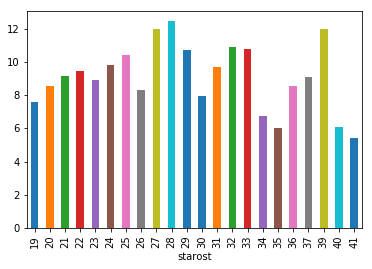

In [43]:
igralci.groupby('starost')['tocke'].mean().plot(kind='bar')

Po pričakovanjih število doseženih točk narašča vse do osemindvajsetega leta, kjer doseže maksimum, saj so igralci v teh letih dovolj izkušeni in telesno najbolje pripravljeni. S starostjo število točk zopet upada, saj igralci izgubljajo na telesni pripravljenosti, zato vedno težje konkurirajo mlajšim in hitrejšim igralcem. 

Edina velika anomalija se pojavi pri igralcih starih devetintrideset let, zato si bomo to ogledali bolj podrobno.

In [44]:
igralci[igralci.starost == 39]

,ime,pozicija,starost,odigrane_tekme,prva_postava,...,ukradene_zoge,blokade,izgubljene_zoge,osebne_napake,tocke
371,Dirk Nowitzki,C,39,77,77,...,0.6,0.6,0.7,1.9,12.0


Kot vidimo, je v tej kategoriji le en igralec, ki je bil v svojih najboljših letih najboljši igralec lige, zato je njegovo odstopanje od povprečja pričakovano.

Sedaj si bomo pogledali, ali imajo starejši igralci višji procent zadetih metov.

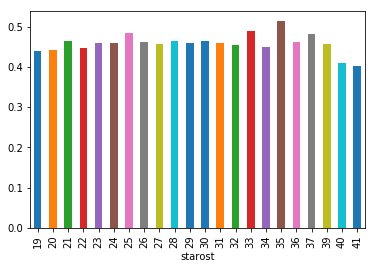

In [6]:
igralci.groupby('starost')['procent_metov'].mean().plot(kind='bar')

Iz grafa je razviden rahel dvig procenta meta mlajših igralcev, nato pa ni opaznih sprememb vse do igralcev v štiridesetih letih. Graf je brez večjih odstopanj in povsem pričakovan, saj mlajši igralci zaradi pomanjkanja izkušenj večkrat izbirajo slabše mete in se čez leta naučijo izbirati boljše mete ter posledično njihov procent naraste.

Opazen padec je le pri igralcih v štiridesetih letih, kar si razlagamo z njihovo slabšo telesno pripravljenostjo.

Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [75]:
igralci_z_najboljšim_metom = igralci.sort_values('procent_metov', ascending=False)[['ime','procent_metov', 'tocke']][:10]
igralci_z_največ_točkami = igralci.sort_values('tocke', ascending=False)[['ime','procent_metov', 'tocke']][:10]


In [93]:
igralci_z_največ_točkami 

,ime,procent_metov,tocke
193,James Harden,0.449,30.4
121,Anthony Davis,0.534,28.1
247,LeBron James,0.542,27.5
15,Giannis Antetokounmpo,0.529,26.9
297,Damian Lillard,0.439,26.9
119,Stephen Curry,0.495,26.4
142,Kevin Durant,0.516,26.4
507,Russell Westbrook,0.449,25.4
111,DeMarcus Cousins,0.470,25.2
57,Devin Booker,0.432,24.9


In [62]:
igralci_z_najboljšim_metom 

,ime,procent_metov,tocke
538,Ante Zizic,0.731,3.7
55,Andrew Bogut,0.680,1.6
424,Willie Reed,0.669,4.6
406,Jakob Poeltl,0.659,6.9
84,Clint Capela,0.652,13.9
93,Tyson Chandler,0.647,6.5
267,DeAndre Jordan,0.645,12.0
333,Salah Mejri,0.642,3.5
195,Montrezl Harrell,0.635,11.0
2,Steven Adams,0.629,13.9


Opazimo, da ni igralca, ki bi bil hkrati med desetimi najboljšimi v doseženih točkah in v procentu metov.
Zanima nas, zakaj je temu tako, zato natančneje preučimo te igralce.

### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [97]:
vsi_podatki_igralcev_z_največjim_izkoristkom = pd.merge(igralci, igralci_z_najboljšim_metom )
vsi_podatki_igralcev_z_največjim_izkoristkom

,ime,pozicija,starost,odigrane_tekme,prva_postava,...,ukradene_zoge,blokade,izgubljene_zoge,osebne_napake,tocke
0,Steven Adams,C,24,76,76,...,1.2,1.0,1.7,2.8,13.9
1,Andrew Bogut,C,33,23,5,...,0.2,0.6,0.8,1.7,1.6
2,Clint Capela,C,23,74,74,...,0.8,1.9,1.4,2.5,13.9
3,Tyson Chandler,C,35,46,46,...,0.3,0.6,1.3,2.3,6.5
4,Montrezl Harrell,C,24,76,3,...,0.5,0.7,0.9,1.9,11.0
5,DeAndre Jordan,C,29,77,77,...,0.5,0.9,1.8,2.6,12.0
6,Salah Mejri,C,31,61,1,...,0.4,1.1,0.6,2.0,3.5
7,Jakob Poeltl,C,22,82,0,...,0.5,1.2,1.0,2.6,6.9
8,Willie Reed,C,27,42,5,...,0.2,0.5,0.5,1.3,4.6
9,Ante Zizic,C,21,32,2,...,0.1,0.4,0.3,0.9,3.7


Takoj opazimo, da prav vsi strelsko najbolj učinkoviti igralci igrajo na poziciji centra. Njihovi meti so iz neposredne bližine koša, zato jih je toliko lažje zadeti.

Text(0, 0.5, 'Meti za tri točke')

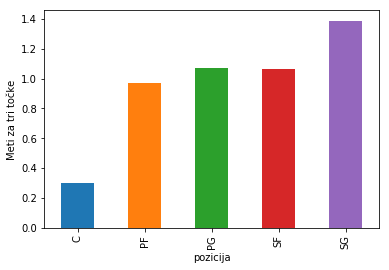

In [110]:
igr = igralci.groupby('pozicija').mean()['meti_za_tri'].plot(kind='bar')
igr.set_ylabel('Meti za tri točke')


Graf potrdi našo domnevo, da centri mečejo lažje mete od igralcev na ostalih pozicijah, saj vržejo skoraj nično število trojk na tekmo, kar pomeni, da je velika večina njihovih metov iz neposredne bližine obroča.

In [29]:
vsestranski_igralci = igralci[(igralci.tocke > 20) & (igralci.skok > 5) & (igralci.podaje > 5)]
vsestranski_igralci


,ime,pozicija,starost,odigrane_tekme,prva_postava,...,ukradene_zoge,blokade,izgubljene_zoge,osebne_napake,tocke
111,DeMarcus Cousins,C,27,48,48,...,1.6,1.6,5.0,3.8,25.2
119,Stephen Curry,PG,29,51,51,...,1.6,0.2,3.0,2.2,26.4
142,Kevin Durant,PF,29,68,68,...,0.7,1.8,3.0,2.0,26.4
190,Blake Griffin,PF,28,58,58,...,0.7,0.3,2.8,2.4,21.4
193,James Harden,SG,28,72,72,...,1.8,0.7,4.4,2.3,30.4
247,LeBron James,PF,33,82,82,...,1.4,0.9,4.2,1.7,27.5
507,Russell Westbrook,PG,29,80,80,...,1.8,0.3,4.8,2.5,25.4


### Histogrami

Združite filme po ocenah in jih preštejte.

In [16]:
plače = pd.read_csv('obdelani-podatki/place_igralcev.csv' )
podatki_s_plačami = pd.merge(igralci, plače)
podatki_s_plačami

,ime,pozicija,starost,odigrane_tekme,prva_postava,...,blokade,izgubljene_zoge,osebne_napake,tocke,placa
0,Alex Abrines,SG,24,75,8,...,0.1,0.3,1.7,4.7,5725000
1,Steven Adams,C,24,76,76,...,1.0,1.7,2.8,13.9,22471910
2,Bam Adebayo,C,20,69,19,...,0.6,1.0,2.0,6.9,2955840
3,LaMarcus Aldridge,C,32,75,75,...,1.2,1.5,2.1,23.1,21461010
4,Jarrett Allen,C,19,72,31,...,1.2,1.1,2.0,8.2,2034120
5,Al-Farouq Aminu,PF,27,69,67,...,0.6,1.1,2.0,9.3,7319035
6,Justin Anderson,SF,24,38,0,...,0.2,0.4,1.4,6.2,2516048
...,...,...,...,...,...,...,...,...,...,...,...
276,Delon Wright,PG,25,69,4,...,0.5,1.1,1.2,8.0,2536898
277,Guerschon Yabusele,PF,22,33,4,...,0.2,0.4,0.7,2.4,2247480


Naredite stolpični diagram teh podatkov.

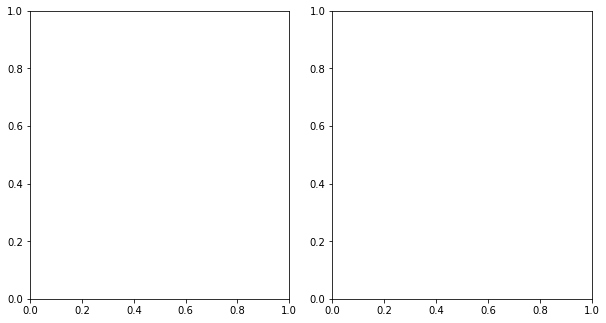

In [56]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.6, 1])
ax2 = fig.add_subplot(121, position=[0.7, 0, 0.6, 1])

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

### Izris povprečne dolžine filma glede na leto

### Izris skupnega zasluzka za posamezno leto

In [ ]:
Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.